In [2]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',150)

In [3]:
#import warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
# reading the application_data.csv into a dataframe
app = pd.read_csv('application_data.csv', header=0)

In [5]:
#reading few rows from the dataframe
app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
#checking the no of rows and cols in the dataframe
app.shape

(307511, 122)

In [7]:
#info of all cols
app.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
#calculate the null percetages:
count = app.isnull().sum()
percentage = app.isnull().sum()/len(app.index)*100 

#creating a df to have a better view
pd.set_option('display.max_rows',130)
df_null = pd.DataFrame({'Col_Name':app.columns, 'Null_Count' : count, 'Null_Percentage': percentage})
df_null

,Col_Name,Null_Count,Null_Percentage
SK_ID_CURR,SK_ID_CURR,0,0.000000
TARGET,TARGET,0,0.000000
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,CODE_GENDER,0,0.000000
FLAG_OWN_CAR,FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,AMT_CREDIT,0,0.000000
AMT_ANNUITY,AMT_ANNUITY,12,0.003902


In [9]:
#subsetting cols having null percentage eqaul to or more than 40%
df_40 = df_null[df_null.Null_Percentage>=40]
df_40

,Col_Name,Null_Count,Null_Percentage
OWN_CAR_AGE,OWN_CAR_AGE,202929,65.990810
EXT_SOURCE_1,EXT_SOURCE_1,173378,56.381073
APARTMENTS_AVG,APARTMENTS_AVG,156061,50.749729
BASEMENTAREA_AVG,BASEMENTAREA_AVG,179943,58.515956
YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
YEARS_BUILD_AVG,YEARS_BUILD_AVG,204488,66.497784
COMMONAREA_AVG,COMMONAREA_AVG,214865,69.872297
ELEVATORS_AVG,ELEVATORS_AVG,163891,53.295980
ENTRANCES_AVG,ENTRANCES_AVG,154828,50.348768
FLOORSMAX_AVG,FLOORSMAX_AVG,153020,49.760822


In [10]:
#taking a count of these cols
len(df_40)

49

In [11]:
#dropping these columns
l = df_40['Col_Name'].tolist()
l

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [12]:
#to cross check:
len(l)

49

In [13]:
app.drop(columns=l, axis=1, inplace=True)

In [14]:
#check if the columns have been dropped
app.shape

(307511, 73)

In [15]:
#subsetting columns having more than 0 but less than 40% null values

df_lessthan40 = df_null[(df_null.Null_Percentage>0)&(df_null.Null_Percentage<40)]
df_lessthan40.sort_values(by='Null_Percentage',ascending=False)                       

,Col_Name,Null_Count,Null_Percentage
OCCUPATION_TYPE,OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_3,EXT_SOURCE_3,60965,19.825307
AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
NAME_TYPE_SUITE,NAME_TYPE_SUITE,1292,0.420148
DEF_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021


In [16]:
#counting these cols
len(df_lessthan40)

18

Analysing these columns

OCCUPATION_TYPE

In [17]:
#OCCUPATION_TYPE
app.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [18]:
#having a look at the null values
app[app.OCCUPATION_TYPE.isnull()].head(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0.652897,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0.669057,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,675000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,0.046220,-9994,-1796,-4668.0,-2661,1,1,0,1,0,1,NaN,1.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Military,0.685011,0.524496,0.0,0.0,0.0,0.0,-849.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,-23920,365243,-9817.0,-4969,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,0.650765,0.751724,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,-23548,365243,-5745.0,-4576,1,0,0,1,0,0,NaN,1.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,XNA,0.766138,0.684828,0.0,0.0,0.0,0.0,-491.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
44,100051,0,Cash loans,M,N,Y,0,202500.000,661702.5,48280.5,598500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007114,-9827,-758,-4166.0,-2380,1,1,1,1,0,0,NaN,2.0,2,2,WEDNESDAY,12,0,0,0,0,1,1,B

In [19]:
#looking at the head and tail most of these look like pensioners.Let's take a count:
len(app[(app.OCCUPATION_TYPE.isnull())&(app.NAME_INCOME_TYPE=='Pensioner')])

55357

Almost 57% so there seems to be a reason for these values being Null. As they are about 31% which is a big number so it is not suggested to impute them with some other value rather we can create a seperate category for these Null values
say 'Unknown'

Looking at another variable for missing values:
EXT_SOURCE_3

In [20]:
#EXT_SOURCE_3
app.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [21]:
app.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [22]:
app[app.EXT_SOURCE_3.isnull()].head(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,NaN,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-14583,-203,-615.0,-2056,1,1,0,1,0,0,Laborers,2.0,2,1,MONDAY,9,0,0,0,0,0,0,Transport: type 2,0.642656,NaN,0.0,0.0,0.0,0.0,-188.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
17,100021,0,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010966,-9776,-191,-4143.0,-2427,1,1,0,1,0,0,Laborers,3.0,2,2,MONDAY,10,0,0,0,1,1,0,Construction,0.683513,NaN,4.0,0.0,4.0,0.0,-2811.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,21375.0,427500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.015221,-18252,-4286,-298.0,-1800,1,1,0,1,0,0,Laborers,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Self-employed,0.113375,NaN,0.0,0.0,0.0,0.0,-296.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
29,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,1,1,0,1,0,0,Laborers,1.0

Mean and median values for this column are very close. We can use median value here for imputation as there's a big diff between min and max values. So using a median would take care of them but since the null percentage is around 20% so we can leave these 
values as is.

Looking at another variable for missing values: AMT_REQ_CREDIT_BUREAU_YEAR

In [23]:
#AMT_REQ_CREDIT_BUREAU_YEAR
app.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [24]:
app.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [25]:
app.AMT_REQ_CREDIT_BUREAU_YEAR.quantile([0.95,0.99])

0.95    6.0
0.99    8.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [26]:
app.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [27]:
app[~(app.AMT_REQ_CREDIT_BUREAU_YEAR.isnull())].head(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427

since there are a lot entries with count as 0 therefore we cannot imply that Nan here stands for zero calls/enquiries made. 
By looking at the value counts records, there is not a very big difference between value counts for '0.0' and '1.0' and '2.0'so here to be safe we can pick median but since the number of null values is high we can leave them as it is.

Looking at another variable for missing values :AMT_REQ_CREDIT_BUREAU_MON

In [28]:
#AMT_REQ_CREDIT_BUREAU_MON
app.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [29]:
app.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

The missing values here can be imputed with the mode value i.e 0.0 as the frequency of this value is too high. 
Also till 75% the value is 0.0000

Looking at another variable for missing values :  NAME_TYPE_SUITE

In [30]:
#NAME_TYPE_SUITE
app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

<AxesSubplot:>

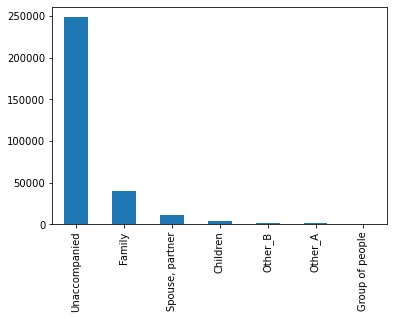

In [31]:
app.NAME_TYPE_SUITE.value_counts().plot(kind='bar')

clearly unaccompanied has been the most frequent choice of customers, so we can impute the mising values with this category type

For columns like AMT_GOODS_PRICE and AMT_ANNUITY, the null percentages are very low 0.090403 and 0.003902 respectively and hence
these records can be dropped.
      

In [32]:
# Dropping some more columns as there significance is not clear as to what these documents are for.
app.drop(app.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'],axis=1, inplace=True)

In [33]:
#checking the number of columns:
app.shape

(307511, 53)

In [34]:
#checking if columns have incorrect data types:
app.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

The data types for all the columns are correct. So no changes to be done

Correcting invalid enteries in the data. For all the Date columns.

In [35]:
app.DAYS_BIRTH.value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [36]:
app['AGE_IN_YEARS'] = app.DAYS_BIRTH.apply(lambda x:round(abs(x)/365))
app['YEARS_EMPLOYED'] = app.DAYS_EMPLOYED.apply(lambda x:round(abs(x)/365))
app['YEARS_REGISTRATION'] = app.DAYS_REGISTRATION.apply(lambda x:round(abs(x)/365))
app['YEARS_ID_PUBLISH'] =  app.DAYS_ID_PUBLISH.apply(lambda x:round(abs(x)/365))

In [37]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,27,7
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9


In [38]:
#dropping the previous days columns:
app.drop(columns={'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'}, axis=1, inplace= True)

In [39]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,27,7
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9


In [40]:
app.groupby('WEEKDAY_APPR_PROCESS_START')['TARGET'].sum()

WEEKDAY_APPR_PROCESS_START
FRIDAY       4101
MONDAY       3934
SATURDAY     2670
SUNDAY       1283
THURSDAY     4098
TUESDAY      4501
WEDNESDAY    4238
Name: TARGET, dtype: int64

In [41]:
#dropping column WEEKDAY_APPR_PROCESS_START as the count seems to be equally distributed.
app.drop('WEEKDAY_APPR_PROCESS_START', axis=1, inplace= True)

In [42]:
#onfirming the shape. The number of columns should be 52
app.shape

(307511, 52)

Analysing Gender columns for any anomalies

In [43]:
app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<AxesSubplot:ylabel='CODE_GENDER'>

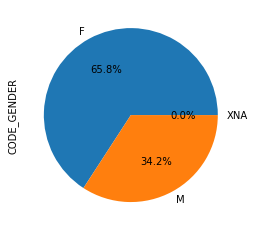

In [44]:
app.CODE_GENDER.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [45]:
#replacing XNA with F
app.CODE_GENDER.replace('XNA','F',inplace=True)

In [46]:
#verifying
app.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [47]:
#checking income type for any invalid entries
app.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [48]:
#checking education type for any invalid entries
app.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [49]:
#checking family status type for any invalid entries
app.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [50]:
# there are only 2 records for unknown. Replacing it with Married(the most frequent category)
app.NAME_FAMILY_STATUS.replace('Unknown','Married',inplace=True)

In [51]:
#checking housig type for any invalid entries
app.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [52]:
#checing for anomalies in DAYS_LAST_PHONE_CHANGE
app.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [53]:
#correcting this column. Converting to positive years
app['YEARS_LAST_PHONE_CHANGE'] = app.DAYS_LAST_PHONE_CHANGE.apply(lambda x:round(abs(x)/365))

ValueError: cannot convert float NaN to integer

In [ ]:
#inspecting the nul records:
app[app.DAYS_LAST_PHONE_CHANGE.isnull()]

In [ ]:
#imputing this value with 0.0(mode value)
app.DAYS_LAST_PHONE_CHANGE=app.DAYS_LAST_PHONE_CHANGE.fillna(0.0)

In [ ]:
#to confirm:
app[app.DAYS_LAST_PHONE_CHANGE.isnull()]

In [ ]:
app['YEARS_LAST_PHONE_CHANGE'] = app.DAYS_LAST_PHONE_CHANGE.apply(lambda x:round(abs(x)/365))

In [54]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,27,7
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9


In [55]:
#dropping the DAYS_LAST_PHONE_CHANGE column:
app.drop('DAYS_LAST_PHONE_CHANGE', axis=1, inplace=True)

In [56]:
#confriming the number of columns. It should be 52
app.shape

(307511, 51)

In [57]:
# checking if there are diff units for HOUR_APPR_PROCESS_START column
app.HOUR_APPR_PROCESS_START.value_counts()

10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64

Sanity Checks:
years of employement cannot be more the age in years


In [58]:
app[app.YEARS_EMPLOYED>app.AGE_IN_YEARS]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,1,0,0,1,0,0,NaN,2.0,2,2,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55,1001,20,10
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,1,0,0,1,1,0,NaN,2.0,2,2,7,0,0,0,0,0,0,XNA,0.555183,0.652897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,56,1001,14,7
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,1,0,0,1,1,0,NaN,2.0,3,3,12,0,0,0,0,0,0,XNA,0.624305,0.669057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,68,1001,25,10
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,1,0,0,1,1,0,NaN,2.0,2,2,11,0,0,0,0,0,0,XNA,0.650765,0.751724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,66,1001,27,14
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,1,0,0,1,0,0,NaN,1.0,2,2,9,0,0,0,0,0,0,XNA,0.766138,0.684828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,65,1001,16,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,1,0,0,1,0,0,NaN,1.0,2,2,15,0,0,0,0,0,0,XNA,0.195625,0.360613,11.0,2.0,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,61,1001,33,11
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,1,0,0,1,0,0,NaN,1.0,2,2,12,0,0,0,0,0,0,XNA,0.589906,0.520898,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,68,1001,31,12
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,1,0,0,1,0,0,NaN,2.0,2,2,10,0,0,0,0,0,0,XNA,0.307082,0.255332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,63,1001,15,11
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,1,0,0,1,1,0,NaN,1.0,2,2,15,0,0,0,0,0,0,XNA,0.346391,0.742182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,67,1001,20,6


In [59]:
app.YEARS_EMPLOYED.value_counts()

1001    55374
1       34796
2       30530
3       27721
4       22933
5       19191
6       15372
7       14080
8       12381
9        9971
0        9752
10       8299
11       6483
12       5621
13       4770
14       4500
15       3916
16       2352
17       2232
18       1914
19       1851
20       1798
21       1510
22       1401
23       1100
24        950
25        862
26        727
28        656
27        638
29        567
30        512
31        439
32        390
34        355
33        352
35        300
36        207
37        174
38        128
39        122
40         82
41         66
42         44
43         31
45         27
44         20
46          7
48          4
47          2
49          1
Name: YEARS_EMPLOYED, dtype: int64

So all these 55374 records are for same value: 1001, which is mostly for pensioners.

FINDING OUTLIERS

1. YEARS_EMPLOYED COLUMN

In [60]:
app[app.YEARS_EMPLOYED==1001].tail(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
306979,455659,0,Cash loans,F,N,Y,0,135000.0,417024.0,20191.5,360000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.030755,1,0,0,1,0,0,NaN,1.0,2,2,14,0,0,0,0,0,0,XNA,0.633567,0.130129,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63,1001,37,11
306980,455660,0,Cash loans,F,N,Y,0,157500.0,802773.0,26658.0,693000.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.030755,1,0,0,1,0,0,NaN,2.0,2,2,10,0,0,0,0,0,0,XNA,0.655955,0.669057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,55,1001,20,7
306987,455667,0,Cash loans,M,N,Y,0,90000.0,152820.0,15241.5,135000.0,Unaccompanied,Pensioner,Higher education,Married,House / apartment,0.035792,1,0,0,1,0,0,NaN,2.0,2,2,11,0,0,0,0,0,0,XNA,0.357342,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,68,1001,7,8
306992,455672,0,Cash loans,F,N,Y,0,270000.0,900000.0,26316.0,900000.0,Family,Pensioner,Higher education,Married,House / apartment,0.011703,1,0,0,1,0,0,NaN,2.0,2,2,12,0,0,0,0,0,0,XNA,0.720865,0.475850,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,58,1001,11,13
307008,455688,0,Cash loans,F,N,N,0,90000.0,315000.0,15151.5,315000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.010006,1,0,0,1,0,0,NaN,1.0,2,2,19,0,0,0,0,0,0,XNA,0.360734,0.689479,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,58,1001,15,11
307020,455704,0,Cash loans,F,N,Y,0,76500.0,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.028663,1,0,0,1,1,0,NaN,1.0,2,2,9,0,0,0,0,0,0,XNA,0.514305,NaN,5.0,0.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,68,1001,4,13
307028,455712,0,Cash loans,F,N,Y,0,220500.0,1006920.0,51543.0,900000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.007020,1,0,0,1,0,0,NaN,2.0,2,2,13,0,0,0,0,0,0,XNA,0.238278,0.394495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,57,1001,12,5
307029,455713,0,Cash loans,F,Y,N,2,153000.0,808650.0,26217.0,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.008625,1,0,0,1,0,0,NaN,3.0,2,2,16,0,0,0,0,0,0,XNA,NaN,0.725276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57,1001,35,12
307043,455727,0,Cash loans,F,N,Y,0,63000.0,517266.0,25015.5,387000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.031329,1,0,0,1,1,0,NaN,1.0,2,2,12,0,0,0,0,0,0,XNA,0.567347,0.768808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,63,1001,11,13
307053,455737,0,Cash loans,F,N,Y,0,112500.0,254700.0,14350.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.019689,1,0,0,1,0,0,NaN,1.0,2,2,11,0,0,0,0,0,0,XNA,0.198762,0.773896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,66,1001,16,13


In [61]:
app.YEARS_EMPLOYED.describe()

count    307511.000000
mean        185.608021
std         382.165887
min           0.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        1001.000000
Name: YEARS_EMPLOYED, dtype: float64

<AxesSubplot:>

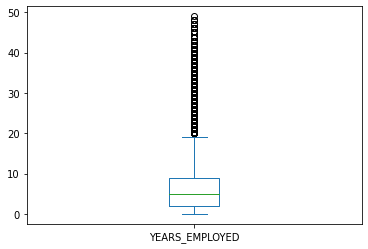

In [62]:
app[app.YEARS_EMPLOYED<1001].YEARS_EMPLOYED.plot.box()

In [63]:
#enquiring some records for years of employment between 40-50
app[(app.YEARS_EMPLOYED>=40)&(app.YEARS_EMPLOYED<=50)].head(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
264,100304,0,Revolving loans,F,N,Y,0,225000.0,675000.0,33750.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.008019,1,1,0,1,1,0,NaN,1.0,2,2,13,0,0,0,0,0,0,Business Entity Type 3,0.654943,0.795803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,43,22,12
2069,102425,0,Cash loans,F,N,N,0,292500.0,943902.0,63463.5,904500.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.006207,1,1,0,1,0,0,Laborers,1.0,2,2,17,0,0,0,0,0,0,Industry: type 2,0.661995,0.443615,4.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,61,41,24,12
2549,102973,0,Cash loans,M,Y,N,0,270000.0,254700.0,25321.5,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,Municipal apartment,0.046220,1,1,0,1,0,0,Drivers,2.0,1,1,14,0,0,0,0,0,0,Business Entity Type 1,0.782811,NaN,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60,40,29,11
4043,104729,0,Cash loans,F,N,Y,0,292500.0,254700.0,13572.0,225000.0,Unaccompanied,Working,Lower secondary,Separated,House / apartment,0.025164,1,1,0,1,0,0,NaN,1.0,2,2,10,0,0,0,0,0,0,Other,0.011207,0.466864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61,42,14,11
9085,110563,0,Cash loans,F,N,Y,0,202500.0,760225.5,32337.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,1,1,0,1,0,0,Core staff,1.0,1,1,11,0,0,0,0,0,0,Government,0.756821,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,40,15,12
11162,113009,0,Cash loans,F,N,Y,0,144000.0,239850.0,23494.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010147,1,1,0,1,0,0,Medicine staff,2.0,2,2,18,0,0,0,0,0,0,Kindergarten,0.626344,0.397946,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,68,42,17,13
11676,113610,0,Cash loans,F,N,Y,0,112500.0,276277.5,11835.0,238500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.031329,1,1,0,1,1,0,Laborers,2.0,2,2,11,0,0,0,0,0,0,Industry: type 11,0.689017,0.456110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,40,35,11
15502,118094,0,Cash loans,F,N,N,0,157500.0,755190.0,30078.0,675000.0,Family,State servant,Secondary / secondary special,Married,Municipal apartment,0.022625,1,1,1,1,0,0,Medicine staff,2.0,2,2,16,0,0,0,0,0,0,Medicine,0.551778,0.159520,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,59,40,34,13
16714,119491,0,Cash loans,M,N,Y,0,225000.0,2517300.0,73732.5,2250000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.025164,1,1,1,1,1,0,Laborers,2.0,2,2,12,0,0,0,0,0,0,Transport: type 2,0.537598,0.798137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,64,42,17,12
18680,121783,0,Cash loans,M,N,Y,0,157500.0,675000.0,21775.5,675000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.019689,1,1,0,1,1,0,Drivers,1.0,2,2,9,0,0,0,0,0,0,Business Entity Type 3,0.513207,0.266457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,60,41,23,11


Inference:
There is clearly an outlier value for years of employment : 1001 but for all these records the employment type is Pensioner.
This age group holds a very big count value and therefore we should cap this at some reasonable value.

2. CNT_CHILDREN COLUMN

In [64]:
app.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [65]:
app.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

<AxesSubplot:>

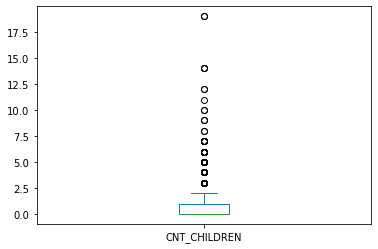

In [66]:
app.CNT_CHILDREN.plot.box()

Clearly above 5 are all outlier values but let's have a look at values above 7

In [67]:
df_child=app[app.CNT_CHILDREN>7]

In [68]:
df_child[['CNT_CHILDREN','AGE_IN_YEARS','NAME_FAMILY_STATUS']]

,CNT_CHILDREN,AGE_IN_YEARS,NAME_FAMILY_STATUS
12615,8,42,Married
23881,9,30,Single / not married
34545,11,47,Married
80948,12,39,Married
132585,10,31,Married
154317,8,31,Married
155369,19,30,Single / not married
171125,12,38,Married
176011,14,49,Separated
183878,14,56,Married


Inference:
Applicants with more than 7 children are very low in number and they are clearly outliers. Their ages are in mostly in the age group 30-40. Some are even single and have 19 children which is a very rare occurence. We can drop these records.

3. AMT_INCOME_TOTAL COLUMN

In [69]:
app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:>

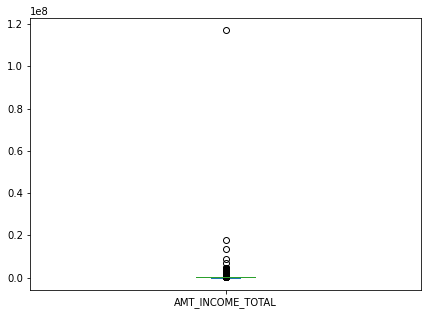

In [70]:
plt.figure(figsize=[7,5])
app.AMT_INCOME_TOTAL.plot.box()
#sns.boxplot(app.AMT_INCOME_TOTAL)

let's look at some higher quantiles

In [71]:
app.AMT_INCOME_TOTAL.quantile([0.5,0.75,0.9,0.95,0.99,0.999,1.0])

0.500       147150.0
0.750       202500.0
0.900       270000.0
0.950       337500.0
0.990       472500.0
0.999       900000.0
1.000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

There's a differnce between 99th and 99.9th percentile. There's a remarkable diff between the 99.9th and the max value and this value is clearly an outlier. Let's explore this even further.

In [72]:
app[app.AMT_INCOME_TOTAL>900000].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
1504,101769,0,Revolving loans,M,Y,Y,0,1080000.0,180000.0,9000.0,180000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,1,1,0,1,0,0,NaN,2.0,1,1,13,0,1,1,0,0,0,Business Entity Type 3,0.652924,0.456110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,15,0,14
1723,102015,0,Cash loans,F,N,Y,0,1935000.0,269550.0,10534.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.007114,1,0,0,1,1,0,NaN,2.0,2,2,11,0,0,0,0,0,0,XNA,0.268663,0.331251,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51,1001,9,6
3371,103938,0,Cash loans,F,N,N,1,1350000.0,2410380.0,109053.0,2250000.0,NaN,Commercial associate,Higher education,Married,House / apartment,0.072508,1,1,0,1,1,0,Managers,3.0,1,1,13,0,1,1,0,0,0,Housing,0.724541,0.569149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,33,2,2,11
4603,105384,0,Revolving loans,F,Y,Y,0,1350000.0,405000.0,20250.0,405000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.018801,1,1,0,1,0,0,Managers,2.0,2,2,12,0,0,0,0,0,0,Business Entity Type 3,0.661593,0.725276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,13,10,11
5673,106637,0,Cash loans,M,Y,Y,3,967500.0,450000.0,30073.5,450000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,1,1,0,1,0,0,Managers,5.0,1,1,14,0,0,0,1,1,0,Business Entity Type 3,0.492086,0.454321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,33,1,8,1


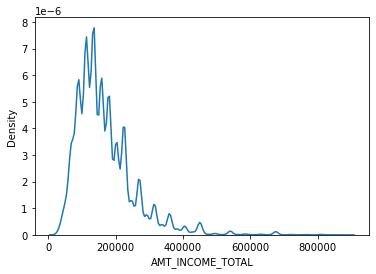

In [73]:
# let's plot some graphs:
sns.distplot(app[app.AMT_INCOME_TOTAL<900000].AMT_INCOME_TOTAL, hist=False)
plt.show()

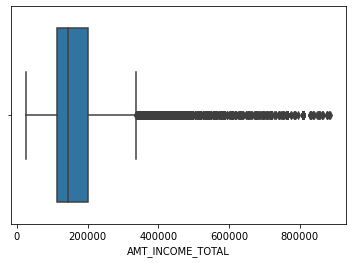

In [74]:
sns.boxplot(app[app.AMT_INCOME_TOTAL<900000].AMT_INCOME_TOTAL)
plt.show()

after the max value in the above box plot there's a huge chunk of values outside the upper fence but they are continuous values and not very far away from the upper fence. These can be though of as people with higher incomes but clearly applicants with income >900000 are outliers. We should drop these values as these are too high and will disturb our analysis or not can be left as it is but not considered during analysis.

4. AMT_CREDIT COLUMN

In [75]:
app.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

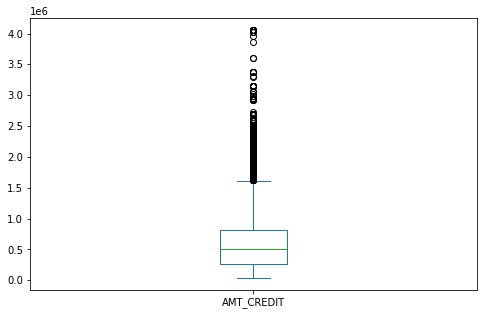

In [76]:
plt.figure(figsize=[8,5])
app.AMT_CREDIT.plot.box()
plt.show()

In [77]:
#looking at higher percentiles:
app.AMT_CREDIT.quantile([0.25,0.5,0.75,0.90,0.95,0.997,0.99,0.999,1.0])

0.250     270000.0
0.500     513531.0
0.750     808650.0
0.900    1133748.0
0.950    1350000.0
0.997    2250000.0
0.990    1854000.0
0.999    2517300.0
1.000    4050000.0
Name: AMT_CREDIT, dtype: float64

In [78]:
#let's find the max value beyond which outliers are present:
max = 808650.0 + 1.5*(808650.0-270000.0)
max

1616625.0

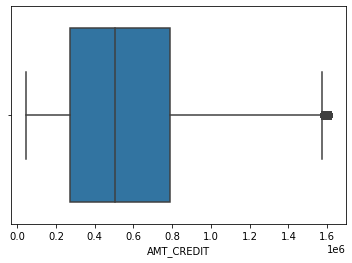

In [79]:
sns.boxplot(app[app.AMT_CREDIT<1616625.0].AMT_CREDIT)
plt.show()

Clearly before this max value there are no outliers and all the values beyond max i.e beyond 95th percentile are outliers and should not be considered for analysis. 

5. AMT_GOODS_PRICE COLUMN

In [80]:
app.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

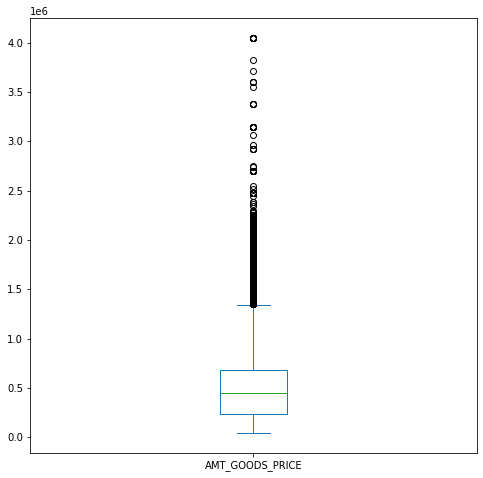

In [81]:
plt.figure(figsize=[8,8])
app.AMT_GOODS_PRICE.plot.box()
plt.show()

In [82]:
#looking at higher percentiles
app.AMT_GOODS_PRICE.quantile([0.25,0.5,0.75,0.90,0.95,0.997,0.99,0.999,1.0])

0.250     238500.0
0.500     450000.0
0.750     679500.0
0.900    1093500.0
0.950    1305000.0
0.997    2160000.0
0.990    1800000.0
0.999    2250000.0
1.000    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

Beyond the upper fence, there is a chunk but attached the fence. Beyond the 99th percentile we have outliers and they must be ignored or capped.

BINNING SOME COLUMNS

1. CREATING AGE GROUPS

In [83]:
#AGE IN YEARS DIVIDED INTO DIFFERENT AGE GROUPS:
app['Age_group'] =  pd.cut(app.AGE_IN_YEARS,[20,30,40,50,60,70],labels=['20-30','30-40','40-50','50-60','60-70'])

In [84]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Age_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,27,7,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9,50-60


2. CREATING CATEGORIES FOR GOODS AMOUNT

In [85]:
app['Price_Category'] = pd.cut(app.AMT_GOODS_PRICE,bins=5, labels=['Very Low', 'Low', 'Medium','High','Very High'])

In [86]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Age_group,Price_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6,20-30,Very Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1,40-50,Low
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7,50-60,Very Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,27,7,50-60,Very Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9,50-60,Very Low


IMBALANCE PERCENTAGE

In [87]:
app.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

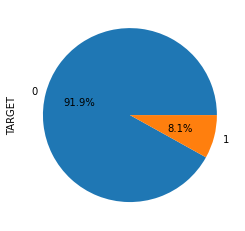

In [88]:
#plotting for a visual reference
app.TARGET.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

Around 8% applicants are defaulters and 92% non- defaulters

DIVING APP DATAFRAME INTO TWO SUBSETS BASED ON TARGET VALUE

In [89]:
df_yes = app[app.TARGET==1]
df_no = app[app.TARGET==0]

In [90]:
#checking
df_yes.TARGET.head()

0     1
26    1
40    1
42    1
81    1
Name: TARGET, dtype: int64

In [91]:
df_no.TARGET.head()

1    0
2    0
3    0
4    0
5    0
Name: TARGET, dtype: int64

ANALYSIS ON TWO SUBSETS

In [92]:
app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

Analysing contract Type

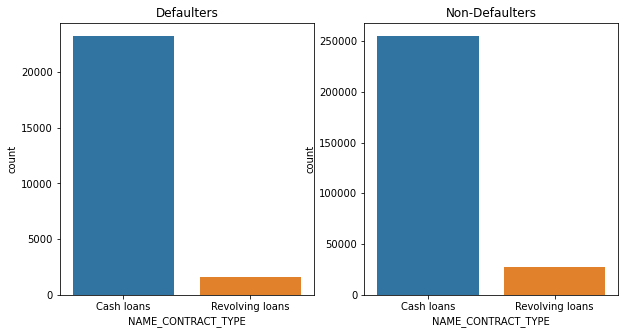

In [93]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(x='NAME_CONTRACT_TYPE', data= df_yes)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(x='NAME_CONTRACT_TYPE', data= df_no)

plt.show()

Inference:
Not much difference between defaulters and non defaulters based on different contract types

Analysing gender variable

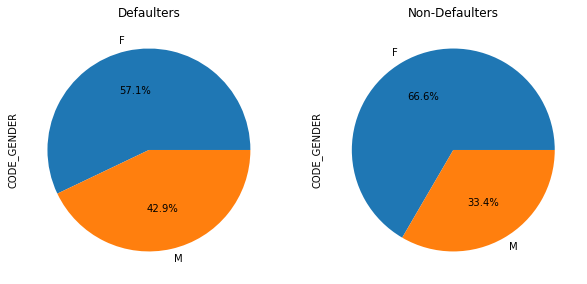

In [94]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title("Defaulters")
df_yes.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
df_no.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.show()

There is a very slight difference between both the categories but looks like that males face more issues in making
timely payments than females

Analysing Own Car variable

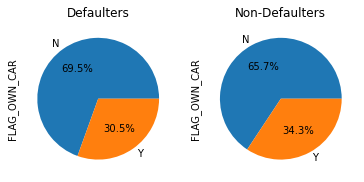

In [95]:
#FLAG_OWN_CAR
plt.subplot(1,2,1)
plt.title("Defaulters")
df_yes.FLAG_OWN_CAR.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
df_no.FLAG_OWN_CAR.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.show()

This does not provide any string evidence of people not being able to make payments on time

Analysing own realty variable

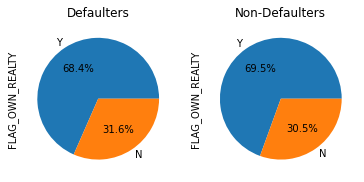

In [96]:
plt.subplot(1,2,1)
plt.title("Defaulters")
df_yes.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
df_no.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.show()

Owning a Realty does not necessarily imply that applicants would not be able to make payments on time.

Analysing the count of children

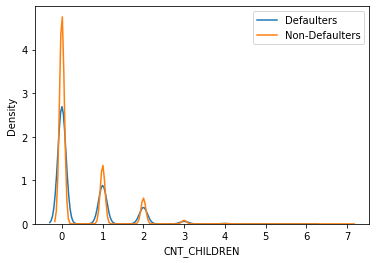

In [97]:
sns.distplot(df_yes[df_yes.CNT_CHILDREN<8].CNT_CHILDREN, label='Defaulters', hist=False)
sns.distplot(df_no[df_no.CNT_CHILDREN<8].CNT_CHILDREN, label='Non-Defaulters',hist=False)
plt.legend()
plt.show()

There a lot more number of clients with 0 children who make payments on time.

Analysis on AMT_INCOME_TOTAL

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

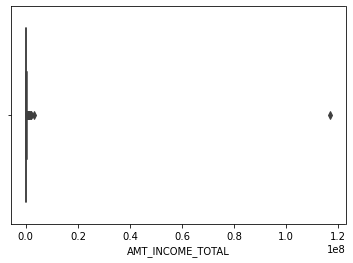

In [98]:
#df_yes.AMT_INCOME_TOTAL.plot.box()
sns.boxplot(df_yes.AMT_INCOME_TOTAL)

In [99]:
df_yes.AMT_INCOME_TOTAL.quantile([0.75,0.9,0.95,0.999,1.0])

0.750       202500.0
0.900       256500.0
0.950       315000.0
0.999       840420.0
1.000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

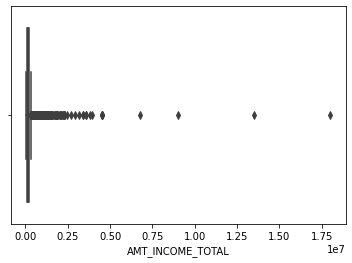

In [100]:
sns.boxplot(df_no.AMT_INCOME_TOTAL)

In [101]:
df_no.AMT_INCOME_TOTAL.quantile([0.75,0.9,0.95,0.999,1.0])

0.750      202500.0
0.900      270000.0
0.950      337500.0
0.999      900000.0
1.000    18000090.0
Name: AMT_INCOME_TOTAL, dtype: float64

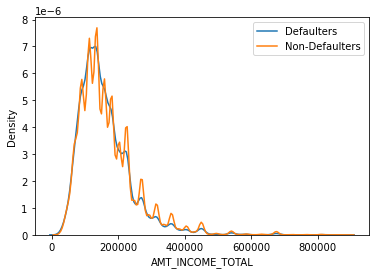

In [102]:
sns.distplot(df_yes[df_yes.AMT_INCOME_TOTAL<900000].AMT_INCOME_TOTAL, label='Defaulters', hist=False)
sns.distplot(df_no[df_no.AMT_INCOME_TOTAL<900000].AMT_INCOME_TOTAL, label='Non-Defaulters',hist=False)
plt.legend()
plt.show()

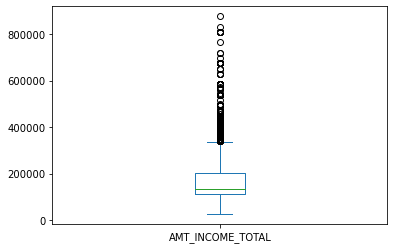

In [103]:
df_yes[df_yes.AMT_INCOME_TOTAL<900000].AMT_INCOME_TOTAL.plot.box()

plt.show()

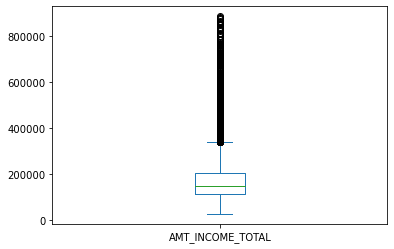

In [104]:
df_no[df_no.AMT_INCOME_TOTAL<900000].AMT_INCOME_TOTAL.plot.box()

plt.show()

Looking at the distplot, we can say that clients having slightly higher incomes tend to pay installments on time.

Analysis on AMT_CREDIT

<AxesSubplot:>

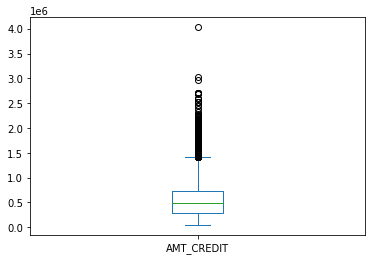

In [105]:
df_yes.AMT_CREDIT.plot.box()

In [106]:
df_yes.AMT_CREDIT.describe()

count    2.482500e+04
mean     5.577785e+05
std      3.464332e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.975200e+05
75%      7.333155e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64

In [107]:
df_yes.AMT_CREDIT.quantile([0.25,0.5,0.75,0.9,0.95,0.99,0.999,1.0])

0.250     284400.00
0.500     497520.00
0.750     733315.50
0.900    1042560.00
0.950    1256400.00
0.990    1711340.64
0.999    2250000.00
1.000    4027680.00
Name: AMT_CREDIT, dtype: float64

In [108]:
max= 733315.50+1.5*(733315.50-284400.00)
max

1406688.75

<AxesSubplot:>

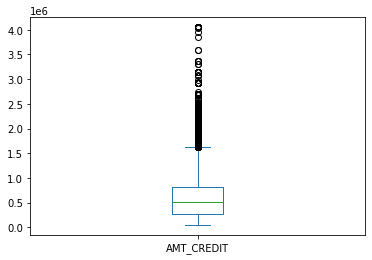

In [109]:
df_no.AMT_CREDIT.plot.box()

In [110]:
df_no.AMT_CREDIT.quantile([0.25,0.5,0.75,0.9,0.95,0.99,0.999,1.0])

0.250     270000.0
0.500     517788.0
0.750     810000.0
0.900    1157670.0
0.950    1350000.0
0.990    1886850.0
0.999    2517300.0
1.000    4050000.0
Name: AMT_CREDIT, dtype: float64

In [111]:
max = 810000.0+1.5*(810000.0-270000.0)
max

1620000.0

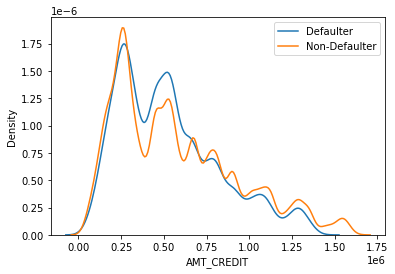

In [112]:
sns.distplot(df_yes[df_yes.AMT_CREDIT<=1406688.75].AMT_CREDIT, hist=False, label= 'Defaulter')
sns.distplot(df_no[df_no.AMT_CREDIT<=1620000.0].AMT_CREDIT,hist=False, label='Non-Defaulter')
plt.legend()
plt.show()

Inference:
For credited amounts between 400,000 & 650,000 approx there are more clients who have defaulted on the payment. Also, although there are a lot spikes but beyond 750,000 there are more clients who pay on time or we can say that clients who take larger loans mostly pay on time.

Analysis on AMT_GOODS_PRICE

<AxesSubplot:>

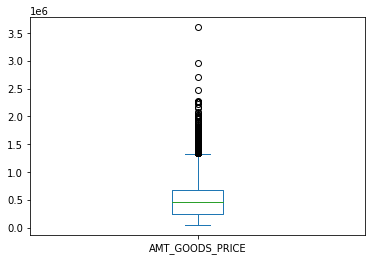

In [113]:
df_yes.AMT_GOODS_PRICE.plot.box()

In [114]:
df_yes.AMT_GOODS_PRICE.quantile([0.25,0.5,0.75,0.9,0.95,0.99,0.999,1.0])

0.250     238500.0
0.500     450000.0
0.750     675000.0
0.900     900000.0
0.950    1125000.0
0.990    1575000.0
0.999    2055546.0
1.000    3600000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [115]:
max = 675000.0 + 1.5*(675000.0-238500.0)
max

1329750.0

In [116]:
df_no.AMT_GOODS_PRICE.quantile([0.25,0.5,0.75,0.9,0.95,0.99,0.999,1.0])

0.250     238500.0
0.500     450000.0
0.750     688500.0
0.900    1125000.0
0.950    1345500.0
0.990    1800000.0
0.999    2250000.0
1.000    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [117]:
max = 688500.0 + 1.5*(688500.0-238500.0)
max

1363500.0

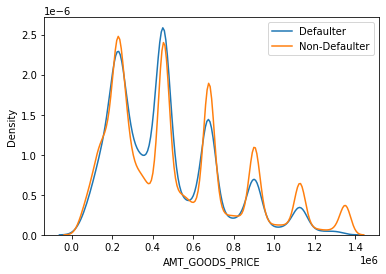

In [118]:
sns.distplot(df_yes[df_yes.AMT_GOODS_PRICE<=1329750.0].AMT_GOODS_PRICE, hist=False, label= 'Defaulter')
sns.distplot(df_no[df_no.AMT_GOODS_PRICE<=1363500.0].AMT_GOODS_PRICE,hist=False, label='Non-Defaulter')
plt.legend()
plt.show()

Inference:
For goods with values higher than approx 600,000 there are less defaulters.

Analysis on NAME_INCOME_TYPE

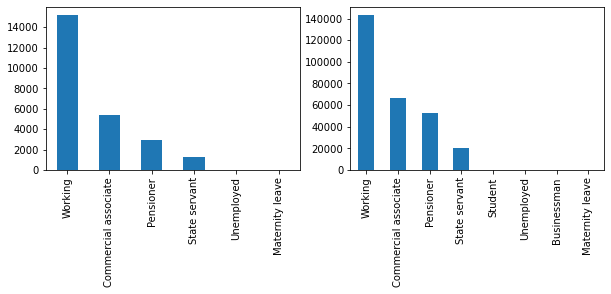

In [119]:
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
df_yes.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.xticks(rotation=90)
plt.subplot(1,2,2)
df_no.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.xticks(rotation=90)

plt.show()

Inference:
Commercial Associates and Pensioners may on time.

Analysis on NAME_EDUCATION_TYPE

In [120]:
df_yes.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64

<AxesSubplot:>

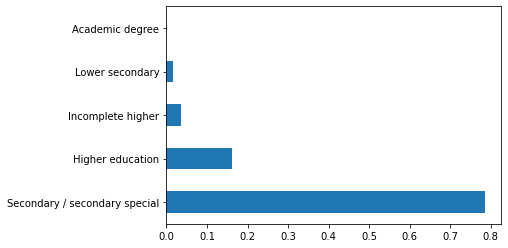

In [121]:
df_yes.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()

In [122]:
df_no.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special    70.349080
Higher education                 25.064559
Incomplete higher                 3.327013
Lower secondary                   1.202394
Academic degree                   0.056954
Name: NAME_EDUCATION_TYPE, dtype: float64

<AxesSubplot:>

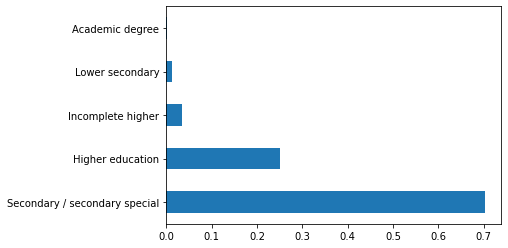

In [123]:
df_no.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()

Inference:
Higher Education category make on time payments.

Analysis on NAME_FAMILY_STATUS

In [124]:
df_yes.NAME_FAMILY_STATUS.value_counts()

Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Name: NAME_FAMILY_STATUS, dtype: int64

In [125]:
df_no.NAME_FAMILY_STATUS.value_counts()

Married                 181584
Single / not married     40987
Civil marriage           26814
Separated                18150
Widow                    15151
Name: NAME_FAMILY_STATUS, dtype: int64

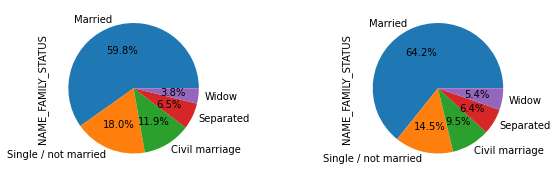

In [126]:
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
df_yes.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
df_no.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.show()

Inference:
This is not a strong obervation but overall married clients and widows do on time payment and single/not mrried clients face difficulties in making on time payments.

Analysing Age Group

<AxesSubplot:>

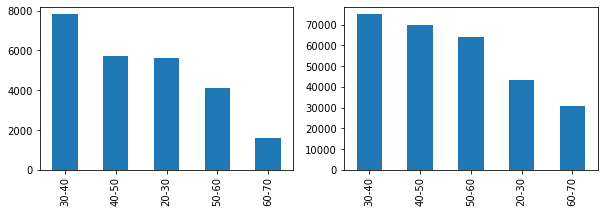

In [127]:
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
df_yes.Age_group.value_counts().plot.bar()
plt.subplot(1,2,2)
df_no.Age_group.value_counts().plot.bar()

Inference:
Age group 40 and above makes payments on time. 20-30 age group has more defaulters.

Years Employed

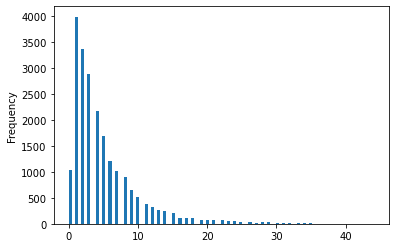

In [128]:
df_yes[df_yes.YEARS_EMPLOYED<50].YEARS_EMPLOYED.plot.hist(bins=100)
plt.show()

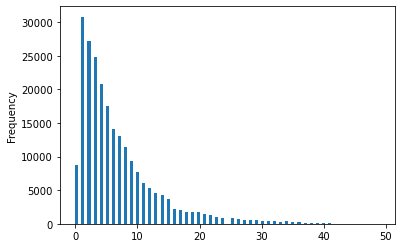

In [129]:
df_no[df_no.YEARS_EMPLOYED<50].YEARS_EMPLOYED.plot.hist(bins=100)
plt.show()

Inference:
Clients who have more years of work experience make on time payments

Analysis based on Region Rating city Wise

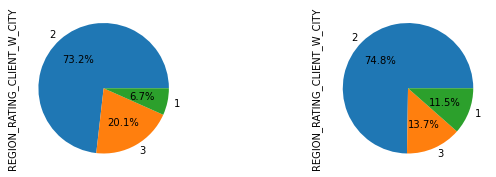

In [130]:
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
df_yes.REGION_RATING_CLIENT_W_CITY.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
df_no.REGION_RATING_CLIENT_W_CITY.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Inference:
Clients from Region rated 3 have more defaulters and region 1 seems to do better.

Analysis on EXT_SOURCE_3

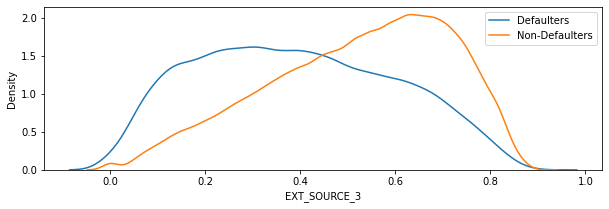

In [131]:
plt.figure(figsize=[10,3])
sns.distplot(df_yes.EXT_SOURCE_3,hist=False,label='Defaulters')

sns.distplot(df_no.EXT_SOURCE_3,hist=False,label='Non-Defaulters')
plt.legend()
plt.show()


Inference:
Defaulters have low score.

BIVARIATE ANALYSIS

AGE_GROUP WITH AMT_CREDIT

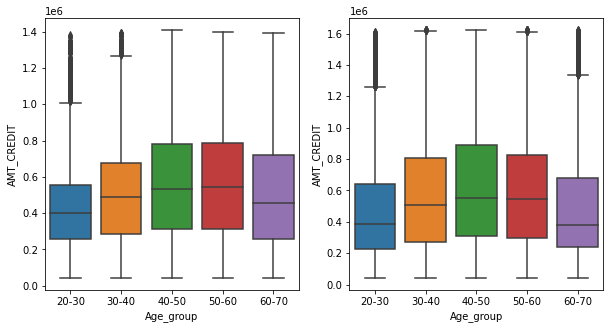

In [267]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot( x=df_yes.Age_group,y=df_yes[df_yes.AMT_CREDIT<=1406688.75].AMT_CREDIT)
plt.subplot(1,2,2)
sns.boxplot(x=df_no.Age_group,y=df_no[df_no.AMT_CREDIT<=1620000.0].AMT_CREDIT)
plt.show()

Inference:
Clients in the age group of 40-50 have higher loan credit amounts and make payment on time.

YEARS_EMPLOYED + AMT_INCOME_TOTAL

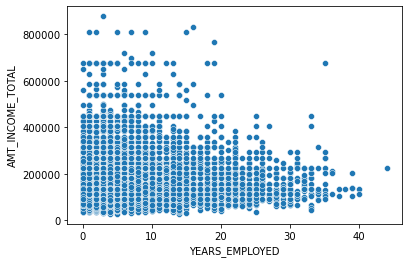

In [133]:
sns.scatterplot(x=df_yes[df_yes.YEARS_EMPLOYED<50].YEARS_EMPLOYED, y=df_yes[df_yes.AMT_INCOME_TOTAL<900000].AMT_INCOME_TOTAL)
plt.show()

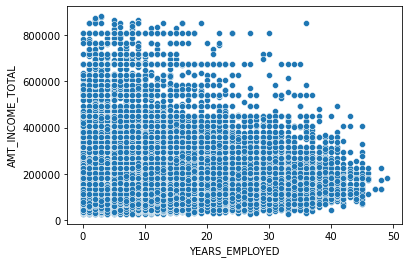

In [134]:
sns.scatterplot(x=df_no[df_no.YEARS_EMPLOYED<50].YEARS_EMPLOYED, y=df_no[df_no.AMT_INCOME_TOTAL<900000].AMT_INCOME_TOTAL)
plt.show()

Inference:
clients who have more work experience have higher incomes and therefore are able to make payments in time whereas clients with less work ex have low incomes and therefore fail to make payment on time.

INCOME_TYPE + AMT_GOODS_PRICE

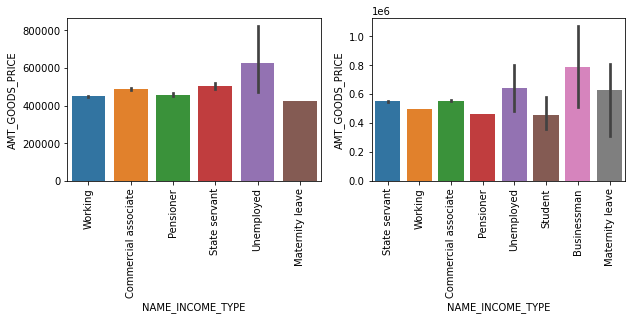

In [135]:
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
sns.barplot( x=df_yes.NAME_INCOME_TYPE,y=df_yes[df_yes.AMT_GOODS_PRICE<=1329750.0].AMT_GOODS_PRICE)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=df_no.NAME_INCOME_TYPE,y=df_no[df_no.AMT_GOODS_PRICE<=1363500.0].AMT_GOODS_PRICE)
plt.xticks(rotation=90)
plt.show()

Unemployed people in the defaulters cat, even if their count is very low but the goods they applied the loan for seems to be priced the highest. On the other hand businessmen make apply for high priced goods and make payments on time and this category is completely missing in defaulters.

PAIR PLOTS

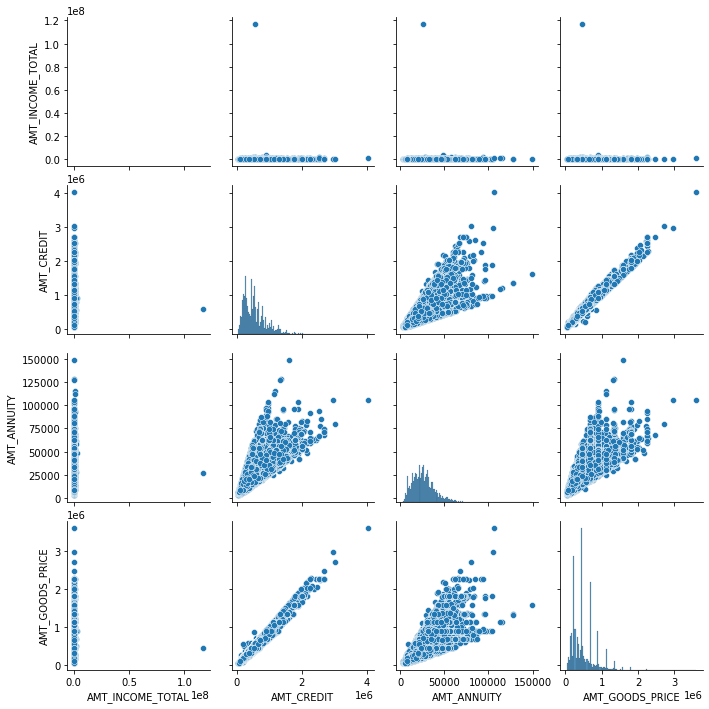

In [136]:
sns.pairplot(df_yes[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

Inference:
Credit amount and goods price have a strong relationship. If one increases, the other also increases which is expected as for higher priced goods the loan amoutn requested would also be higher.

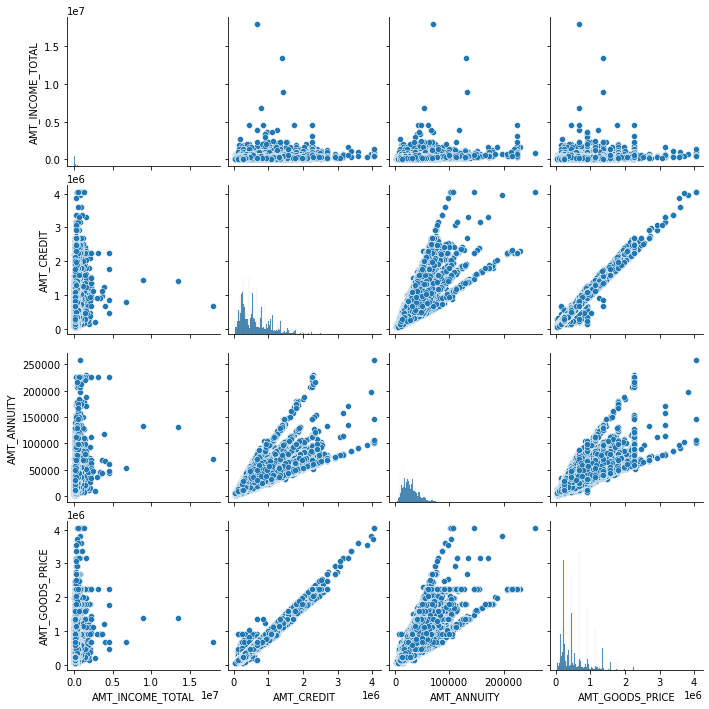

In [137]:
sns.pairplot(df_no[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

ANALYSING Price_Category(Goods Price) + NAME_INCOME_TYPE

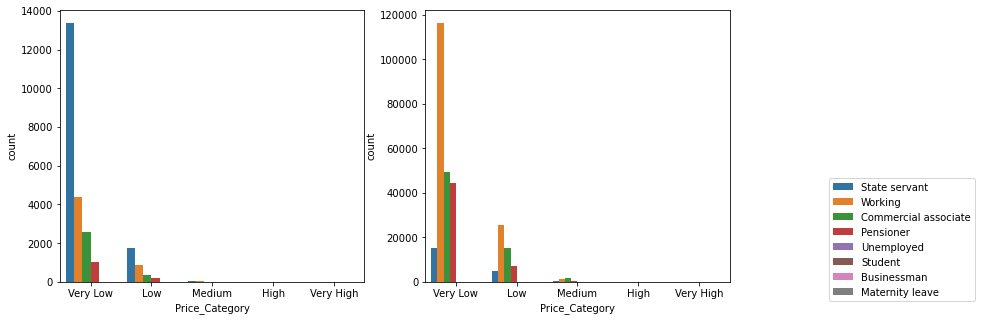

In [138]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
sns.countplot(data=df_yes,x='Price_Category',hue='NAME_INCOME_TYPE')
plt.legend(bbox_to_anchor=(1.31,0.4))

plt.subplot(1,2,2)
sns.countplot(data=df_no,x='Price_Category',hue='NAME_INCOME_TYPE')
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

Inference:
    Pensioners, Commercial associates and Working pay on time. State servants defaulters(Very Low Cat)

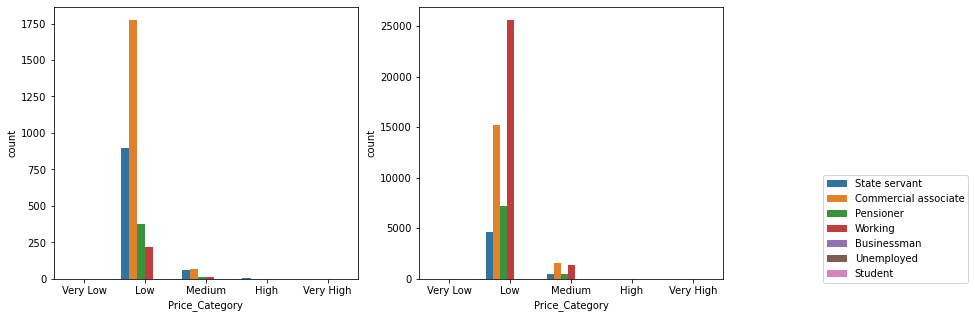

In [139]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
sns.countplot(data=df_yes[~(df_yes.Price_Category=='Very Low')],x='Price_Category',hue='NAME_INCOME_TYPE')
plt.legend(bbox_to_anchor=(1.31,0.4))

plt.subplot(1,2,2)
sns.countplot(data=df_no[~(df_no.Price_Category=='Very Low')],x='Price_Category',hue='NAME_INCOME_TYPE')
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

Inference:
Commercial Assocciates and State Servants - defaulters. Pensioners, Working pay on time 

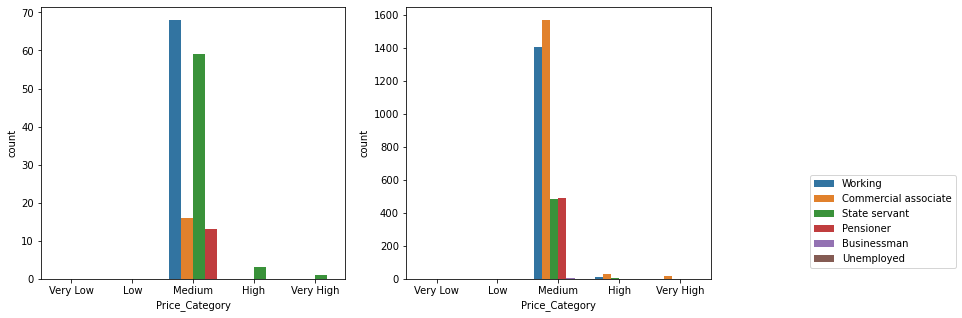

In [140]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
sns.countplot(data=df_yes[~(df_yes.Price_Category.isin(['Very Low','Low']))], x='Price_Category', hue='NAME_INCOME_TYPE')
plt.legend(bbox_to_anchor=(1.31,0.4))

plt.subplot(1,2,2)
sns.countplot(data=df_no[~(df_no.Price_Category.isin(['Very Low','Low']))], x='Price_Category', hue='NAME_INCOME_TYPE')
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

Inference:
    Commercial associates and pensioners pay on time. Working and state servant default(MEdium
                                                                                    )

ANALYSING Age_group + Price_Category

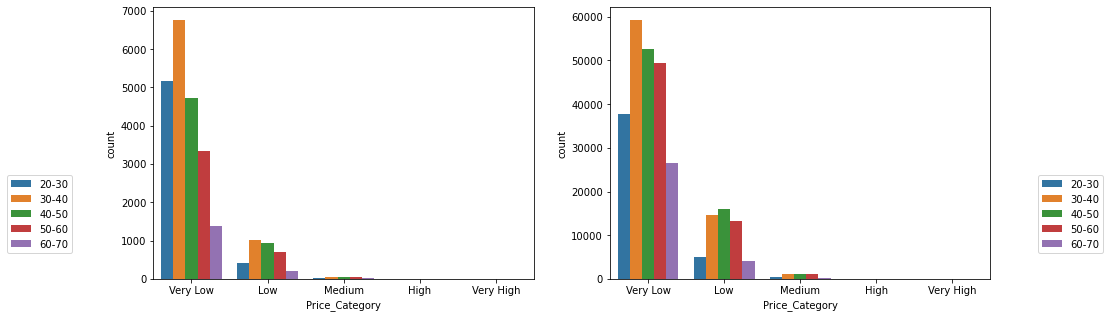

In [141]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(data=df_yes, x='Price_Category', hue='Age_group')
plt.legend(bbox_to_anchor=(-0.20,0.4))

plt.subplot(1,2,2)
sns.countplot(data=df_no, x='Price_Category', hue='Age_group')
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

Inference:
Age group 40 and above seems to be makes payments on time across different categories of goods price.

ANALYSING GENDER, EDUCATION TYPE AND CREDIT AMOUNT

In [142]:
yes = pd.pivot_table(data=df_yes,index='CODE_GENDER', columns='NAME_EDUCATION_TYPE',values='AMT_CREDIT',aggfunc= lambda x: np.quantile(x,0.75))
yes

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
CODE_GENDER,,,,,
F,1153122.75,877500.0,675000.000,599355.0,724248.0
M,NaN,832797.0,699976.125,640080.0,679500.0


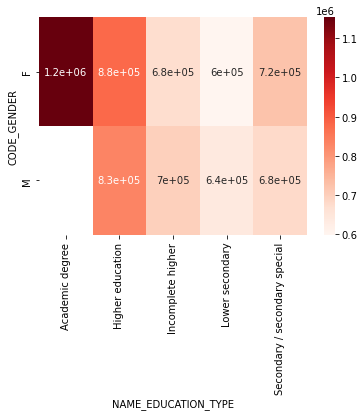

In [143]:
sns.heatmap(yes,annot=True,cmap="Reds")
plt.show()

In [144]:
no = pd.pivot_table(data=df_no,index='CODE_GENDER', columns='NAME_EDUCATION_TYPE',values='AMT_CREDIT',aggfunc= lambda x: np.quantile(x,0.75))
no

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
CODE_GENDER,,,,,
F,1006920.0,916470.0,760225.5,675000.0,781920.0
M,1036890.0,973503.0,808650.0,675000.0,808650.0


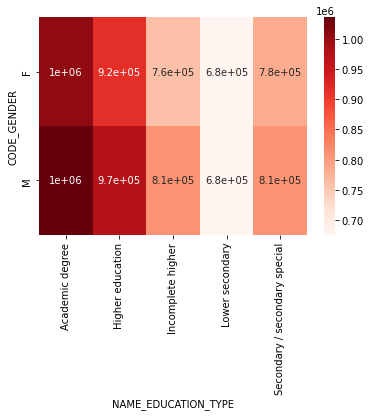

In [145]:
sns.heatmap(no,annot=True,cmap="Reds")
plt.show()

Inference:
Females with academic degrees take high loan credit amounts and defaults the most. Academic Degree holder males and Higher Education Male category seems to be paying on time.

READING PREVIOUS APPLICATION INTO DATA FRAME

In [146]:
prev = pd.read_csv("previous_application.csv", header=0)

In [147]:
#looking at header
pd.set_option("display.max_columns",40)
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
prev.shape

(1670214, 37)

In [149]:
#info of all cols
prev.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [150]:
#calculate the null percetages:
count = prev.isnull().sum()
percentage = prev.isnull().sum()/len(prev.index)*100 

In [151]:
#creating a df to have a better view
pd.set_option('display.max_rows',40)
df_null_1 = pd.DataFrame({'Col_Name':prev.columns, 'Null_Count' : count, 'Null_Percentage': percentage})
df_null_1

,Col_Name,Null_Count,Null_Percentage
SK_ID_PREV,SK_ID_PREV,0,0.000000
SK_ID_CURR,SK_ID_CURR,0,0.000000
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,0,0.000000
AMT_ANNUITY,AMT_ANNUITY,372235,22.286665
AMT_APPLICATION,AMT_APPLICATION,0,0.000000
AMT_CREDIT,AMT_CREDIT,1,0.000060
AMT_DOWN_PAYMENT,AMT_DOWN_PAYMENT,895844,53.636480
AMT_GOODS_PRICE,AMT_GOODS_PRICE,385515,23.081773
WEEKDAY_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,0,0.000000
HOUR_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,0,0.000000


In [152]:
#subsetting cols having null percentage eqaul to or more than 40%
df_40_1 = df_null_1[df_null_1.Null_Percentage>=40]
df_40_1

,Col_Name,Null_Count,Null_Percentage
AMT_DOWN_PAYMENT,AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,RATE_DOWN_PAYMENT,895844,53.636480
RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_INTEREST_PRIVILEGED,RATE_INTEREST_PRIVILEGED,1664263,99.643698
NAME_TYPE_SUITE,NAME_TYPE_SUITE,820405,49.119754
DAYS_FIRST_DRAWING,DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_LAST_DUE,DAYS_LAST_DUE,673065,40.298129
DAYS_TERMINATION,DAYS_TERMINATION,673065,40.298129


In [153]:
#taking a count of these cols
len(df_40_1)


11

In [154]:
#dropping these columns
l1 = df_40_1['Col_Name'].tolist()
l1

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [155]:
#to cross check:
len(l1)

11

In [156]:
prev.drop(columns=l1, axis=1, inplace=True)

In [157]:
#analysing the distribution of weekdays column
prev.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)

TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150908
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

In [158]:
#All the days of the week seem to be equally distributed in the data hence dropping WEEKDAY_APPR_PROCESS_START column
prev.drop('WEEKDAY_APPR_PROCESS_START', axis=1, inplace=True)


In [159]:
#check if the columns have been dropped
prev.shape


(1670214, 25)

In [160]:
#subsetting columns having more than 0 but less than 40% null values

df_lessthan40_1 = df_null_1[(df_null_1.Null_Percentage>0)&(df_null_1.Null_Percentage<40)]
df_lessthan40_1.sort_values(by='Null_Percentage',ascending=False)   


,Col_Name,Null_Count,Null_Percentage
AMT_GOODS_PRICE,AMT_GOODS_PRICE,385515,23.081773
AMT_ANNUITY,AMT_ANNUITY,372235,22.286665
CNT_PAYMENT,CNT_PAYMENT,372230,22.286366
PRODUCT_COMBINATION,PRODUCT_COMBINATION,346,0.020716
AMT_CREDIT,AMT_CREDIT,1,0.000060


Analysing column AMT_GOODS_PRICE

In [161]:
prev[prev.AMT_GOODS_PRICE.isnull()].head(50)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,9,Y,1,XNA,Refused,-239,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2608217,268456,Cash loans,NaN,0.0,0.0,NaN,11,Y,1,XNA,Canceled,-385,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
130,2740457,367231,Cash loans,NaN,0.0,0.0,NaN,10,Y,1,XNA,Canceled,-314,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
133,2147401,202386,Cash loans,NaN,0.0,0.0,NaN,11,Y,1,XNA,Canceled,-26,XNA,XAP,Repeater,XNA,XNA,XNA,Channel of corporate sales,-1,XNA,NaN,XNA,Cash
143,1975174,276237,Revolving loans,22500.0,0.0,450000.0,NaN,13,Y,1,XAP,Approved,-510,XNA,XAP,Repeater,XNA,Cards,x-sell,Country-wide,1500,Consumer electronics,0.0,XNA,Card X-Sell


In [162]:
prev.AMT_GOODS_PRICE.mean()

227847.27928334344

In [163]:
prev.AMT_GOODS_PRICE.mode()

0    45000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [164]:
prev.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [165]:
prev.AMT_GOODS_PRICE.quantile([0.5,0.75,0.9,0.95,1.0])

0.50     112320.0
0.75     234000.0
0.90     585000.0
0.95     900000.0
1.00    6905160.0
Name: AMT_GOODS_PRICE, dtype: float64

There's a noticeable difference between mean and median which implies there are outliers. Also mode value is 45000.0 but since the count of null value is very high it is better to leave them as it is and not impute as it may hamper the analysis.

Analysis of AMT_ANNUITY

In [268]:
prev[prev.AMT_ANNUITY.isnull()].head(50)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,11,Y,1,XNA,Canceled,14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,7,Y,1,XNA,Canceled,21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,15,Y,1,XNA,Canceled,386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,15,Y,1,XNA,Canceled,57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,9,Y,1,XNA,Refused,239,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1146680,293304,Cash loans,NaN,0.0,0.0,NaN,12,Y,1,XNA,Canceled,367,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
129,2608217,268456,Cash loans,NaN,0.0,0.0,NaN,11,Y,1,XNA,Canceled,385,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
130,2740457,367231,Cash loans,NaN,0.0,0.0,NaN,10,Y,1,XNA,Canceled,314,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
133,2147401,202386,Cash loans,NaN,0.0,0.0,NaN,11,Y,1,XNA,Canceled,26,XNA,XAP,Repeater,XNA,XNA,XNA,Channel of corporate sales,-1,XNA,NaN,XNA,Cash


In [167]:
prev.AMT_ANNUITY.mean()

15955.120659450406

In [168]:
prev.AMT_ANNUITY.mode()

0    2250.0
Name: AMT_ANNUITY, dtype: float64

In [169]:
prev.AMT_ANNUITY.median()

11250.0

In [170]:
prev.AMT_ANNUITY.value_counts().head()

2250.0     31865
11250.0    13974
6750.0     13442
9000.0     12496
22500.0    11903
Name: AMT_ANNUITY, dtype: int64

There doesnt seem to be any valid reason for these missing values. The mean and median are not very distant in terms of their values but with the null percentage being too high it is better to leave them than imputing them.

Analysis of CNT_PAYMENT

In [171]:
prev.CNT_PAYMENT.value_counts().head()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
Name: CNT_PAYMENT, dtype: int64

In [172]:
prev.CNT_PAYMENT.mean()

16.0540815603274

In [173]:
prev.CNT_PAYMENT.mode()

0    12.0
Name: CNT_PAYMENT, dtype: float64

In [174]:
prev.CNT_PAYMENT.median()

12.0

The median and mode values are same and there's not much difference between mean and median so we can impute them with median but since the percentage of null values is high, we can leave these values as it is.

Analysis of PRODUCT_COMBINATION

<AxesSubplot:>

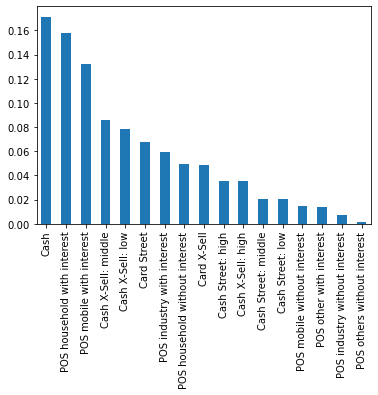

In [175]:
prev.PRODUCT_COMBINATION.value_counts(normalize=True).plot.bar()

The most recurring category is Cash and since the count if null values is also less it is ok to impute those with 'Cash'

In [176]:
#checking if columns have incorrect data types:
prev.dtypes


SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION             object
dtype: object

No incorrect data type

Fixing incorrect values

NAME_CONTRACT_TYPE column

In [177]:
prev.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64

Here the meaning if XNA is unknown. It also contributes to only 0.02% and it could mean that it is a Not Applicable category like small loans given to customers. So we can treat them as missing values here.

In [178]:
#converting these XNA as missing values
prev.loc[prev.NAME_CONTRACT_TYPE=='XNA','NAME_CONTRACT_TYPE'] = np.NaN

In [179]:
prev.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         44.767191
Consumer loans     43.665188
Revolving loans    11.567621
Name: NAME_CONTRACT_TYPE, dtype: float64

NAME_CASH_LOAN_PURPOSE column

In [180]:
prev.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

Here the meaning of XNA and XAP is unknown but since they contribute a total of above 90% of the data so we will leave them as it is.

DAYS_DECISION column>> days cannot be negative values so changing them into positive values.

In [181]:
prev.DAYS_DECISION.value_counts()

-245     2444
-238     2390
-210     2375
-273     2350
-196     2315
         ... 
-2882     163
-2922     162
-2921     158
-2902     148
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [182]:
prev['DAYS_DECISION'] = prev.DAYS_DECISION.apply(lambda x:abs(x))

In [183]:
prev.DAYS_DECISION.value_counts()

245     2444
238     2390
210     2375
273     2350
196     2315
        ... 
2882     163
2922     162
2921     158
2902     148
1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

NAME_PAYMENT_TYPE column

In [184]:
prev.NAME_PAYMENT_TYPE.value_counts(normalize=True)

Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: NAME_PAYMENT_TYPE, dtype: float64

In [185]:
#looking at these records
prev[prev.NAME_PAYMENT_TYPE=='XNA']

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,11,Y,1,XNA,Canceled,14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,7,Y,1,XNA,Canceled,21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,15,Y,1,XNA,Canceled,386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,15,Y,1,XNA,Canceled,57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670188,1713281,247019,Cash loans,26446.500,900000.0,900000.0,900000.0,20,Y,1,XNA,Canceled,68,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,60.0,low_normal,Cash X-Sell: low
1670190,2381880,175920,Cash loans,NaN,0.0,0.0,NaN,11,Y,1,XNA,Canceled,243,XNA,XAP,Repeater,XNA,XNA,XNA,Contact center,-1,XNA,NaN,XNA,Cash
1670191,1755809,122569,Revolving loans,2250.000,45000.0,45000.0,45000.0,12,Y,1,XAP,Refused,499,XNA,HC,Repeater,XNA,Cards,walk-in,Stone,150,Consumer electronics,0.0,XNA,Card Street
1670192,2101747,339383,Revolving loans,3375.000,0.0,67500.0,NaN,18,Y,1,XAP,Approved,540,XNA,XAP,Refreshed,XNA,Cards,x-sell,AP+ (Cash loan),10,XNA,0.0,XNA,Card X-Sell


In [186]:
prev[prev.NAME_PAYMENT_TYPE=='XNA'].NAME_CLIENT_TYPE.value_counts()

Repeater     530735
New           50919
Refreshed     44485
XNA            1245
Name: NAME_CLIENT_TYPE, dtype: int64

In [187]:
prev[prev.NAME_PAYMENT_TYPE=='XNA'].NAME_CONTRACT_STATUS.value_counts(normalize=True)

Canceled        0.499015
Approved        0.337603
Refused         0.162562
Unused offer    0.000819
Name: NAME_CONTRACT_STATUS, dtype: float64

Meaning of XNA is unknown and looking at these records shows that majority were repeat clients and 50% of the time the lean was canclled by the client but it makes upto 38% of the data so we will leave it as it is.

CODE_REJECT_REASON column

In [188]:
prev.CODE_REJECT_REASON.value_counts(normalize=True)

XAP       0.810132
HC        0.104915
LIMIT     0.033337
SCO       0.022432
CLIENT    0.015828
SCOFR     0.007670
XNA       0.003140
VERIF     0.002116
SYSTEM    0.000429
Name: CODE_REJECT_REASON, dtype: float64

Meaning of XAP and XNA unknown so leaving them as it is.

NAME_CLIENT_TYPE column 

In [189]:
prev.NAME_CLIENT_TYPE.value_counts(normalize=True)*100

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

In [190]:
#let's have a look at these records
prev[prev.NAME_CLIENT_TYPE=='XNA']

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
694,1044207,241230,Cash loans,NaN,0.0,0.0,NaN,12,Y,1,XNA,Canceled,53,XNA,XAP,XNA,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
3419,1167657,366138,Cash loans,55400.895,1354500.0,1451047.5,1354500.0,17,Y,1,XNA,Refused,231,Cash through the bank,HC,XNA,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,36.0,low_normal,Cash X-Sell: low
3594,2609511,334664,Consumer loans,2223.990,20659.5,23112.0,20659.5,11,Y,1,XAP,Approved,245,Cash through the bank,XAP,XNA,Computers,POS,XNA,Country-wide,50,Consumer electronics,12.0,low_action,POS household without interest
5819,2092311,281867,Cash loans,NaN,0.0,0.0,NaN,13,Y,1,XNA,Canceled,242,XNA,XAP,XNA,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
5990,2680830,335491,Cash loans,32048.460,877500.0,1016496.0,877500.0,9,Y,1,Repairs,Refused,195,Cash through the bank,HC,XNA,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,48.0,low_normal,Cash Street: low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669063,2461196,265508,Cash loans,26510.760,450000.0,545040.0,450000.0,17,Y,1,XNA,Refused,71,XNA,HC,XNA,XNA,Cash,x-sell,Contact center,-1,XNA,48.0,middle,Cash X-Sell: middle
1669517,1353023,419192,Cash loans,NaN,0.0,0.0,NaN,11,Y,1,XNA,Canceled,14,XNA,XAP,XNA,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
1669763,1740043,319018,Cash loans,32470.515,765000.0,916470.0,765000.0,21,Y,1,XNA,Approved,274,XNA,XAP,XNA,XNA,Cash,x-sell,Contact center,-1,XNA,60.0,middle,Cash X-Sell: middle
1669927,2177010,117022,Cash loans,NaN,0.0,0.0,NaN,9,Y,1,XNA,Canceled,4,XNA,XAP,XNA,XNA,XNA,XNA,Contact center,-1,XNA,NaN,XNA,Cash


These could be missing values. We can impute them with the mode value of this column.

In [191]:
#imputing XNA with Repeater
prev.NAME_CLIENT_TYPE = prev.NAME_CLIENT_TYPE.apply(lambda x:'Repeater' if x=='XNA' else x)

In [192]:
#confirming the changes
prev.NAME_CLIENT_TYPE.value_counts()

Repeater     1233202
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

 NAME_GOODS_CATEGORY column

In [193]:
prev.NAME_GOODS_CATEGORY.value_counts(normalize=True)*100

XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.300740
Medical Supplies             0.230090
Vehicles                     0.201771
Sport and Leisure            0.178480
Gardening                    0.159740
Other                        0.152915
Office Appliances            0.139683
Tourism                      0.099329
Medicine                     0.092802
Direct Sales                 0.026703
Fitness                      0.012513
Additional Service           0.007664
Education                    0.006406
Weapon                       0.004610
Insurance                    0.003832
Animals     

XNA is a major chunk of the data so we cannot drop or impute these. Neither we can treat them as missing, so leaving them as it is.

For all the other columns where XNA is present, the distribution of it is a considerable amount and therefore leaving those values as it is. Also for SELLERPLACE_AREA, there is a value which is -1. We could have treated it as a incorrect value but it is a very major chunk of about 50% of the entire data of that column so leaving it as it is.

HANDLING OUTLIERS

AMT_ANNUITY column

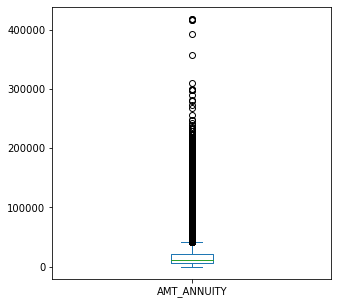

In [194]:
plt.figure(figsize=[5,5])
prev.AMT_ANNUITY.plot.box()
plt.show()

In [195]:
prev.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [196]:
prev.AMT_ANNUITY.quantile([0.5,0.75,0.9,0.95,0.99,0.995,0.997,0.999,1.0])

0.500     11250.0000
0.750     20658.4200
0.900     34703.8200
0.950     45336.7800
0.990     69685.7886
0.995     82037.7450
0.997     92539.5300
0.999    119231.4150
1.000    418058.1450
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:ylabel='Frequency'>

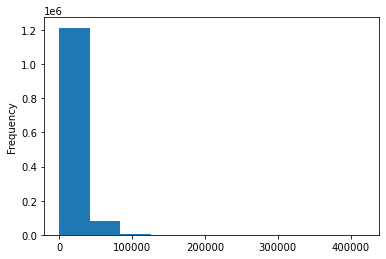

In [197]:
prev.AMT_ANNUITY.plot.hist()

<AxesSubplot:ylabel='Frequency'>

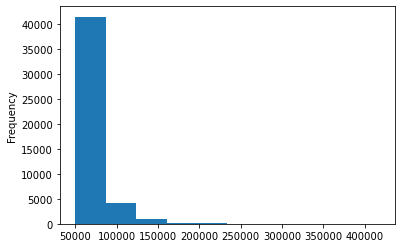

In [198]:
prev[prev.AMT_ANNUITY>50000].AMT_ANNUITY.plot.hist()

<AxesSubplot:>

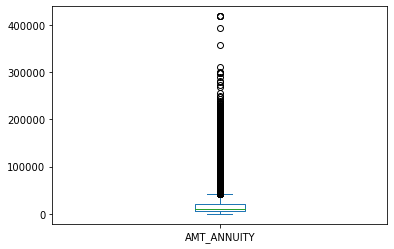

In [199]:
prev[prev.AMT_ANNUITY<800000].AMT_ANNUITY.plot.box()

It looks like that even beyond 50000, which is around the 95th percentile there is a huge chunk of high values which is tightly attached to the upper fence. This chunk could be of people who are well off. So all the values beyond the 99th percentile are outliers and they should be ignored while doing analysis.

AMT_APPLICATION column

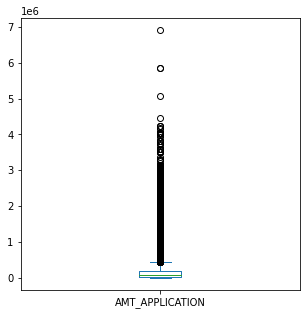

In [200]:
plt.figure(figsize=[5,5])
prev.AMT_APPLICATION.plot.box()
plt.show()

In [201]:
prev.AMT_APPLICATION.describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

In [202]:
prev.AMT_APPLICATION.quantile([0.5,0.75,0.9,0.95,0.99,0.995,0.997,0.999,1.0])

0.500      71046.0
0.750     180360.0
0.900     450000.0
0.950     787500.0
0.990    1350000.0
0.995    1710000.0
0.997    1894500.0
0.999    2250000.0
1.000    6905160.0
Name: AMT_APPLICATION, dtype: float64

<AxesSubplot:ylabel='Frequency'>

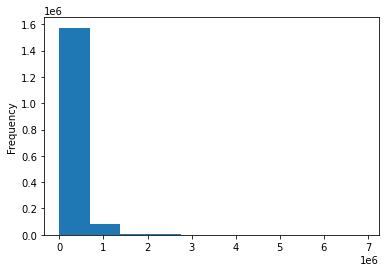

In [203]:
prev.AMT_APPLICATION.plot.hist()


<AxesSubplot:>

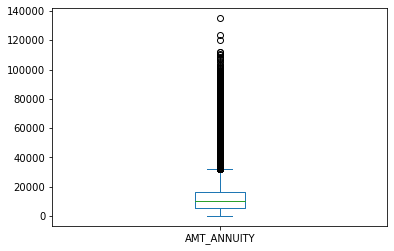

In [204]:
prev[prev.AMT_APPLICATION<500000].AMT_ANNUITY.plot.box()

Outliers beyond 90th percentile. Should not be considered during analysis.


AMT_CREDIT column

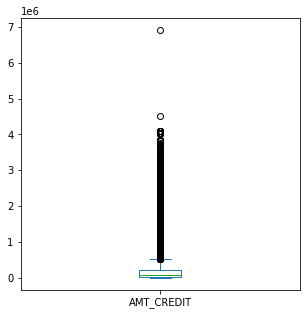

In [205]:
plt.figure(figsize=[5,5])
prev.AMT_CREDIT.plot.box()
plt.show()


In [206]:
prev.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [207]:
prev.AMT_CREDIT.quantile([0.25,0.5,0.75,0.9,0.95,1.0])


0.25      24160.5
0.50      80541.0
0.75     216418.5
0.90     533160.0
0.95     886500.0
1.00    6905160.0
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:>

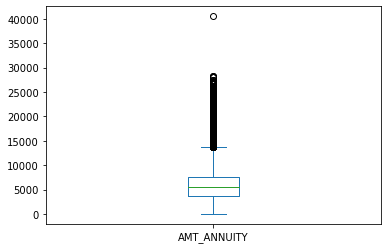

In [208]:
prev[prev.AMT_CREDIT<80000].AMT_ANNUITY.plot.box()

There's huge jump between the 50th and the 75th percentile. 

In [209]:
max = 216418.5 + 1.5*(216418.5-24160.5)
max

504805.5

Values beyond 504805.5 are outliers in this case.

MERGING THE TWO DATASETS

In [210]:
df = app.merge(prev, on='SK_ID_CURR', how='inner')

In [211]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,...,179055.0,179055.0,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,...,1035882.0,900000.0,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,...,348637.5,337500.0,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,...,68053.5,68809.5,15,Y,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,...,20106.0,24282.0,5,Y,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [212]:
df.shape

(1413701, 77)

In [213]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 77 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1410175 non-null  object  
 12  NAME_INCOME_TYPE            

ANALYSIS

<AxesSubplot:>

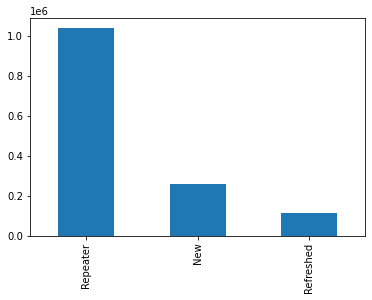

In [216]:
df.NAME_CLIENT_TYPE.value_counts().plot.bar()

Most of the applicants are repeat.

Analysing NAME_EDUCATION_TYPE and NAME_CLIENT_TYPE

In [222]:
res = pd.pivot_table(data=df,index='NAME_EDUCATION_TYPE', columns='NAME_CLIENT_TYPE', values='TARGET')
res

NAME_CLIENT_TYPE,New,Refreshed,Repeater
NAME_EDUCATION_TYPE,,,
Academic degree,0.033784,0.015873,0.010870
Higher education,0.059125,0.052225,0.061865
Incomplete higher,0.091735,0.084409,0.089826
Lower secondary,0.122093,0.109510,0.105213
Secondary / secondary special,0.099596,0.079301,0.094157


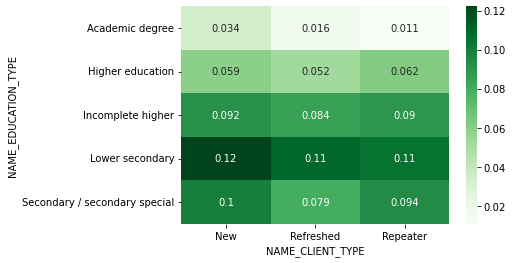

In [223]:
sns.heatmap(res,annot=True,cmap='Greens')
plt.show()

Inference:
Lower secondary education cat and New clients seem to be defaulting the most. Repeat clients with Academic degrees pay on time followed by Refreshed clients with academic degree. Also Academic degree followed by Higher Education people seem to be making payments on time.

Analysing NAME_PRODUCT_TYPE

In [225]:
df.NAME_PRODUCT_TYPE.value_counts(normalize=True)*100

XNA        63.666433
x-sell     27.261352
walk-in     9.072215
Name: NAME_PRODUCT_TYPE, dtype: float64

<AxesSubplot:ylabel='TARGET'>

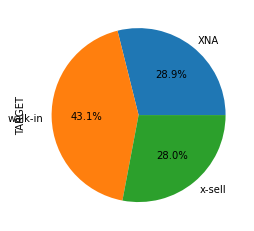

In [231]:
df.groupby('NAME_PRODUCT_TYPE')['TARGET'].mean().plot.pie(autopct='%1.1f%%')

XNA and x-sell category applicants pay on time compared to walk-in applicants

Amounts applied by walk-in clients.

<AxesSubplot:xlabel='AMT_APPLICATION', ylabel='Density'>

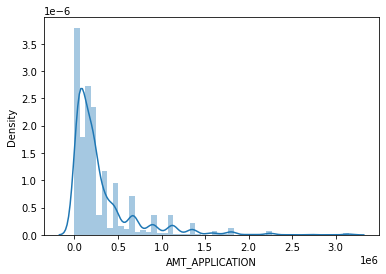

In [230]:
walk_in=df[(df.NAME_PRODUCT_TYPE=='walk-in')&(df.TARGET==1)]
sns.distplot(walk_in.AMT_APPLICATION)

Inference:
Walk-In clients applying for small amounts for loan default the most.

Analysis on NAME_PAYMENT_TYPE and NAME_PAYMENT_TYPE

In [236]:
res = pd.pivot_table(data=df,index='NAME_PAYMENT_TYPE', columns='NAME_PAYMENT_TYPE', values='TARGET')
res


NAME_INCOME_TYPE,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
NAME_PAYMENT_TYPE,,,,,,,
Cash through the bank,0.076465,1.0,0.055623,0.060826,0.0,0.525000,0.094834
Cashless from the account of the employer,0.063348,NaN,0.038674,0.106061,NaN,NaN,0.101480
Non-cash from your account,0.079870,NaN,0.053472,0.047273,NaN,NaN,0.098378
XNA,0.089111,1.0,0.062966,0.069934,0.0,0.581395,0.115369


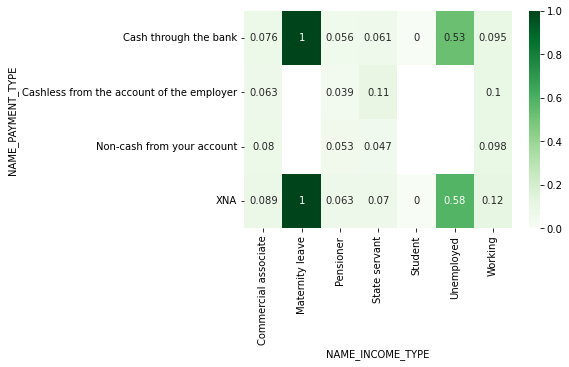

In [238]:
sns.heatmap(res,annot=True,cmap='Greens')
plt.show()

Inference:
Pensioners who choose payment type as Cashless from the account of the employer pay on time.

Analysing Industry Type

<AxesSubplot:xlabel='NAME_SELLER_INDUSTRY'>

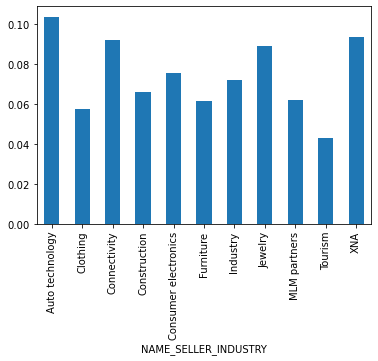

In [242]:
df.groupby('NAME_SELLER_INDUSTRY')['TARGET'].mean().plot.bar()

Inference:
Auto Technology sector has most defaulters. Tourism has the least.

Analysing NAME_FAMILY_STATUS and NAME_CONTRACT_STATUS

In [239]:
df.NAME_PORTFOLIO.value_counts()

POS      592460
Cash     391663
XNA      307213
Cards    121985
Cars        380
Name: NAME_PORTFOLIO, dtype: int64

In [254]:
res = pd.pivot_table(data=df,index='NAME_FAMILY_STATUS', columns='NAME_CONTRACT_STATUS', values='TARGET')
res

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_FAMILY_STATUS,,,,
Civil marriage,0.090594,0.107754,0.138100,0.093830
Married,0.072763,0.089647,0.117785,0.075280
Separated,0.074784,0.089991,0.114933,0.080000
Single / not married,0.090425,0.106577,0.133413,0.107545
Widow,0.054470,0.058473,0.080761,0.060927


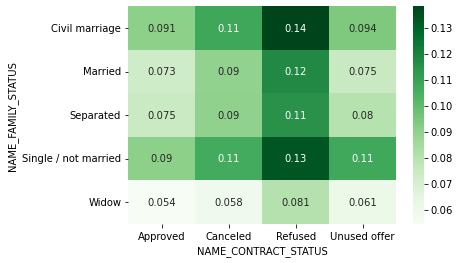

In [255]:
sns.heatmap(res,annot=True,cmap='Greens')
plt.show()

Inference:
Widows overall and Married applicants whose previous loan was approved

In [256]:
df_corr = df[['AMT_ANNUITY_x', 'AMT_APPLICATION','AMT_CREDIT_x', 'AMT_GOODS_PRICE_x',
                    'AMT_ANNUITY_y', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'CNT_PAYMENT']].corr()
df_corr

,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_ANNUITY_y,AMT_CREDIT_y,AMT_GOODS_PRICE_y,CNT_PAYMENT
AMT_ANNUITY_x,1.000000,0.112063,0.758441,0.762251,0.202537,0.107646,0.134160,-0.005500
AMT_APPLICATION,0.112063,1.000000,0.118809,0.120734,0.809972,0.975683,0.999871,0.683056
AMT_CREDIT_x,0.758441,0.118809,1.000000,0.986310,0.152961,0.116746,0.137746,0.037726
AMT_GOODS_PRICE_x,0.762251,0.120734,0.986310,1.000000,0.155065,0.117226,0.138942,0.036073
AMT_ANNUITY_y,0.202537,0.809972,0.152961,0.155065,1.000000,0.817977,0.822204,0.398084
AMT_CREDIT_y,0.107646,0.975683,0.116746,0.117226,0.817977,1.000000,0.993201,0.675539
AMT_GOODS_PRICE_y,0.134160,0.999871,0.137746,0.138942,0.822204,0.993201,1.000000,0.674547
CNT_PAYMENT,-0.005500,0.683056,0.037726,0.036073,0.398084,0.675539,0.674547,1.000000


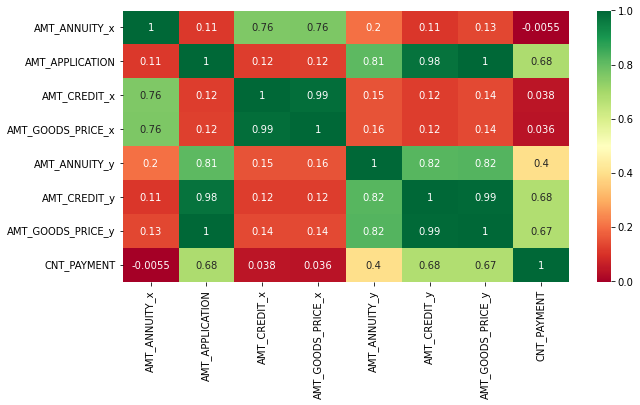

In [260]:
plt.figure(figsize=[10,5])
sns.heatmap(df_corr,annot=True,cmap='RdYlGn')
plt.show()

Inference:
The strongest correlations:
1. amt_application  and amt annuity_y = 0.81
2. amt_application and amt_credit_y = 0.98
3. amt_credit_x  and amt_goods_price_x = 0.99
4. amt_annuity_y and amt_credit_y = 0.82
5. amt_annuity_y and amt_goods_price_y = 0.82
6. amt_credit_y and amt_goods_price_y =0.99

CONCLUSION:
1. Clients with higher work experience, 15 years and above have higher incomes and make payments on time.
2. Clients with 0-1 children.
3. Commercial Associates and Pensioners.
4. Males with Academic degrees followed by Higher Education.
5. Married and Widows.
6. Age-Group 40 and above.
7. Clients with score 0.5 and above.
8. Businessmen.
9. Seller Industry – Tourism
10. Repeater clients.
